In [2]:
import pandas as pd
import numpy as np
from io import StringIO
import sys

In [3]:
csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

if (sys.version_info < (3, 0)):
    csv_data = unicode(csv_data)
    
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [4]:
# 누락된 값의 개수 반환
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [5]:
# 누락된 값 제거
df.dropna(axis = 0) # 누락값이 있는 열 삭제
df.dropna(axis = 1) # 누락값이 있는 행 삭제
df.dropna(how = 'all') # 모든열이 NAN일 때 행을 삭제
df.dropna(thresh = 4) # NAN이 아닌 값이 4개보다 작은 행 삭제
df.dropna(subset = ['C']) # NAN이 있는 C열 삭제

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


---

### 누락된 값 대체 

In [6]:
# SimpleImputer 사용
from sklearn.impute import SimpleImputer

imr = SimpleImputer(missing_values=np.nan, strategy='mean') # strategy = 'median' or 'most frequent' 가능
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [7]:
# KNN
from sklearn.impute import KNNImputer
kimr = KNNImputer()
kimr.fit_transform(df.values)


array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [9]:
# pandas 사용
df.fillna(df.mean()) # 평균

# df.fillna(method='bffill') # 누락된 값을 다음 행의 값으로 대체

# df.fillna(method='ffill') # 누락된 값을 이전 행의 값으로 대체

# df.fillna(method='ffill', axis = 1) # 열을 사용

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


----

## 범주형 데이터 다루기

In [10]:
import pandas as pd

In [11]:
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [12]:
# 순서o    순서가 있는 범주는 매핑을 직접 만들어야 함
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}

df['size'] = df['size'].map(size_mapping)
df

# 정수 값을 다시 문자열로 변환
# inv_size_mapping = {v: k for k, v in size_mapping.items()}
# df['size'].map(inv_size_mapping)

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [13]:
# 클래스 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y
# 되돌리기
# class_le.inverse_transform(y)

array([1, 0, 1])

In [14]:
# 순서X  원-핫 인코딩(순서없는 특성에 고유값에 더미 특성 만듬)

pd.get_dummies(df[['price', 'color', 'size']])

# pd.get_dummies(df[['price', 'color', 'size']], columns=['size']) # 변환하려는 특성을 구체적으로 지정
# 다중 공선성 문제 주의 변수간 상관관계를 감소하려면 특성 열 하나 삭제 O => 잃는 정보 X 
# EX) blue열 삭제 => green, red = 0일 때 blue임을 알 수 있음
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True) # 첫 번째 열 삭제 

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


-----

### 데이터셋 분리

In [15]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [16]:
from sklearn.model_selection import train_test_split
X = df_wine.iloc[:, 1:].values
y = df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [17]:
# 특성 스케일 맞추기
# 최대-최소 스케일링 (정해진 범위의 값이 필요할 때)
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

# 표준화
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)
# 표준화는 이상치 정보가 유지되기 때문에 최소-최대 스케일에 비해 이상치에 덜 민감

# RobustScaler
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()
X_train_robust = rbs.fit_transform(X_train)
X_test_robust = rbs.transform(X_test)
# 이상치가 많이 포함된 작은 데이터셋을 다룰 때 도움

# MaxAbsScaler
from sklearn.preprocessing import MaxAbsScaler
mas = MaxAbsScaler()
X_train_maxabs = mas.fit_transform(X_train)
X_test_maxabs = mas.transform(X_test)

### 유용한 특성 선택
#### 과적합 방지
- 많은 훈련 데이터 모으기
- 규제를 통해 복잡도 제한
- 파라미터 개수가 적은 간단한 모델 선택
- 데이터 차원 줄이기

In [18]:
# L1 규제
from sklearn.linear_model import LogisticRegression
LogisticRegression(solver='liblinear', penalty='l1')

LogisticRegression(penalty='l1', solver='liblinear')

 1) Color intensity                0.172994
 2) Proline                        0.154752
 3) Alcohol                        0.138280
 4) Flavanoids                     0.137927
 5) OD280/OD315 of diluted wines   0.120440
 6) Hue                            0.083862
 7) Total phenols                  0.046418
 8) Magnesium                      0.034068
 9) Alcalinity of ash              0.031147
10) Malic acid                     0.028834
11) Proanthocyanins                0.025277
12) Ash                            0.014972
13) Nonflavanoid phenols           0.011029


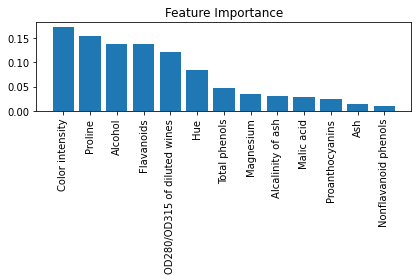

In [28]:
# 랜덤포레스트의 특성 중요도 이용
# RF에서 두 개 이상의 특성이 상관관계가 높다면 하나의 특성은 높은 순위를 갖지만 다른 특성 정보는 잡아내지 못할 수 있음 => 모델의 예측 성능에만 관심 있다면 신경 X
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
# plt.savefig('images/04_09.png', dpi=300)
plt.show()

In [21]:
# SelectFromModel
# 모델 휸련이 끝난 후 사용자가 지정한 임계 값을 기반으로 특성을 선택
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('이 임계 조건을 만족하는 샘플의 수:', 
      X_selected.shape[1])

이 임계 조건을 만족하는 샘플의 수: 5


In [22]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Color intensity                0.172994
 2) Proline                        0.154752
 3) Alcohol                        0.138280
 4) Flavanoids                     0.137927
 5) OD280/OD315 of diluted wines   0.120440
